<a href="https://colab.research.google.com/github/aditya161205/Data-DaVinci/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime

In [45]:
data=pd.read_csv("microsoft.csv")
data.head()



,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


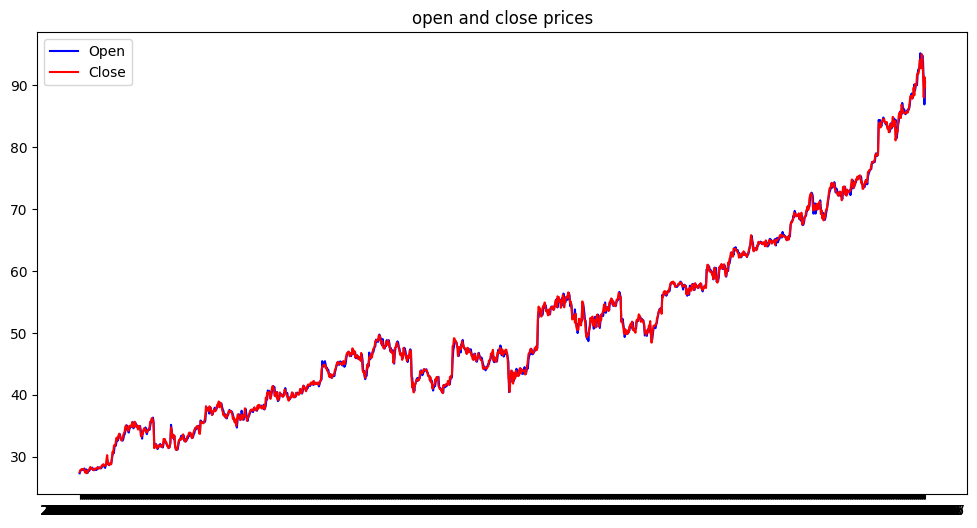

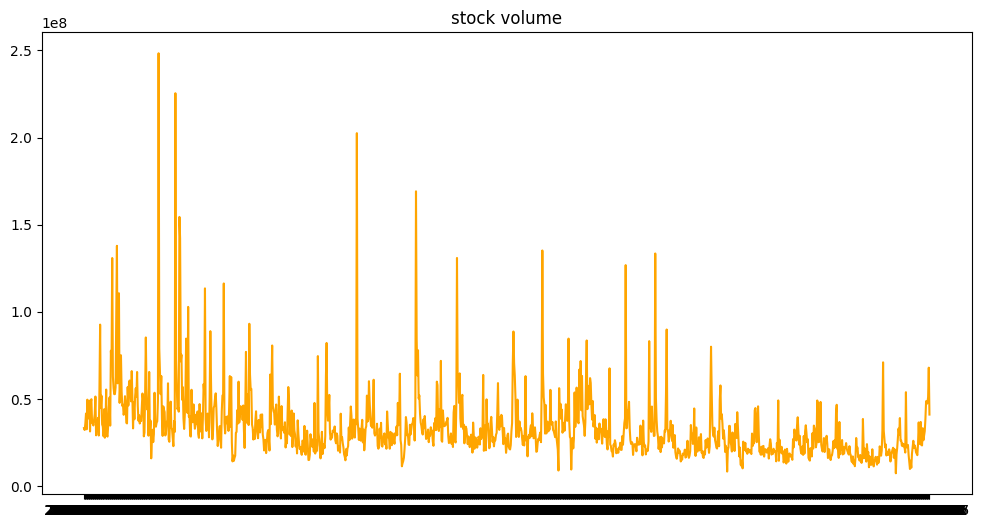

In [46]:
#plot 1 open and close prices in time

plt.figure(figsize=(12,6))
plt.plot(data['date'],data['open'],label="Open",color="blue")
plt.plot(data['date'],data['close'],label="Close",color="red")
plt.title("open and close prices")
plt.legend()
plt.show()

#plot 2 volume
plt.figure(figsize=(12,6))
plt.plot(data['date'],data['volume'], label="Volume", color="orange")
plt.title("stock volume")
plt.show()


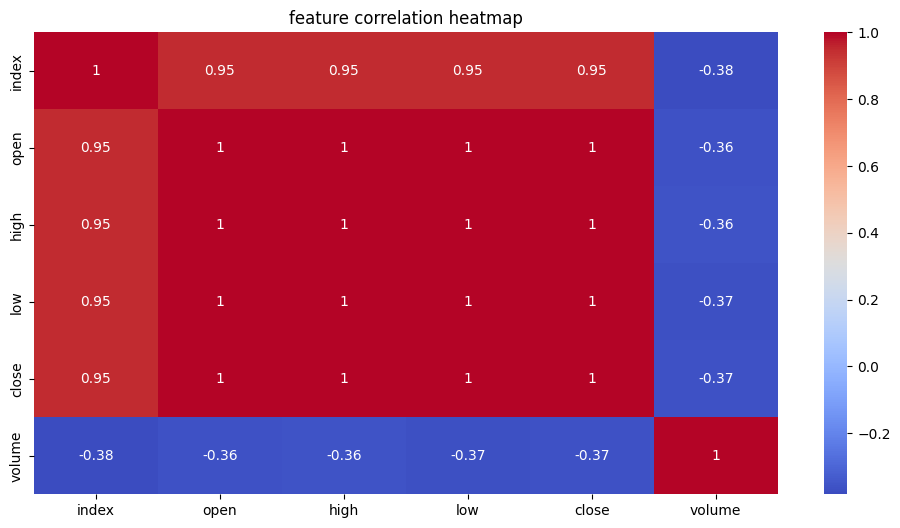

In [47]:
numeric_data=data.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(),annot=True,cmap="coolwarm")
plt.title("feature correlation heatmap")
plt.show()


In [48]:
data['date']=pd.to_datetime(data['date'])


In [49]:
prediction=data.loc[
    (data['date']>datetime(2013,1,1))& (data['date']<datetime(2018,1,1))
]

In [50]:
stock_close=data["close"]
dataset=stock_close.values
training_data_len=int(np.ceil(len(dataset * 0.95)))


In [53]:
scaler=StandardScaler()
# Reshape the dataset to a 2D array with one column
reshaped_dataset = dataset.reshape(-1, 1)
scaled_data=scaler.fit_transform(reshaped_dataset)


In [54]:
training_data=scaled_data[:training_data_len]

In [55]:
x_train,y_train=[],[]

for i in range(60,len(training_data)):
  x_train.append(training_data[i-60:i,0])
  y_train.append(training_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [58]:

model = keras.models.Sequential()

model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=[x_train.shape[1], 1]))
model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))  # Corrected spelling
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam", loss="mae", metrics=[keras.metrics.RootMeanSquaredError()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
training =model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.4647 - root_mean_squared_error: 0.6202
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.1455 - root_mean_squared_error: 0.2032
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.1410 - root_mean_squared_error: 0.2017
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.1247 - root_mean_squared_error: 0.1718
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.1247 - root_mean_squared_error: 0.1865
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.1168 - root_mean_squared_error: 0.1621
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.1226 - root_mean_squared_error: 0.1693
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.1211 - root_mean_squared_error: 0.1689
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.1139 - root_mean_squared_error: 0.1665
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.1157 - root_mean_squared_error:

In [71]:
test_data = scaled_data[training_data_len - 60:]
x_test, y_test = [], dataset[training_data_len:]


for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1 ))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


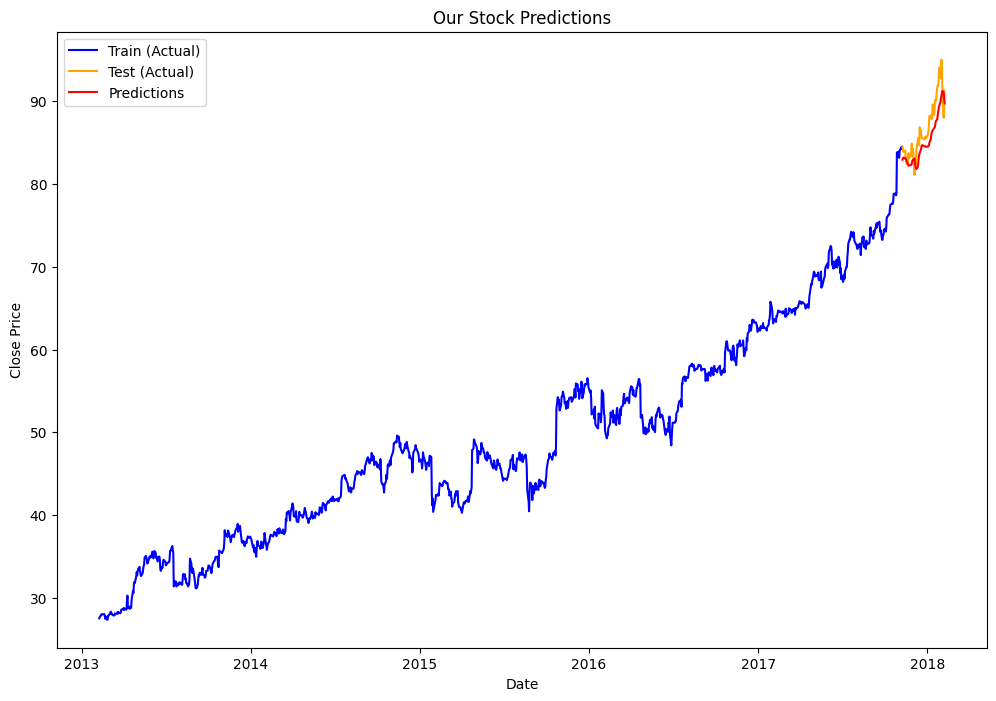

In [74]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

train=data[:training_data_len]
test=data[training_data_len:]


test = test.copy()

test['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.plot(train['date'], train['close'], label="Train (Actual)", color='blue')
plt.plot(test['date'], test['close'], label="Test (Actual)", color='orange')
plt.plot(test['date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
